In [1]:
from rdkit import Chem
import pyaniasetools as pya

from ase_interface import ANIENS,ensemblemolecule
import hdnntools as hdt
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

van Der Waals correction will be unavailable. Please install ased3


In [2]:
nets = dict()

ntdir = '/home/jsmith48/scratch/ANI-AL_retrain/arc6/'
nets['ANI-1x(wb97x/TZ)']= {'cns' : ntdir + 'rHCNO-4.6R_16-3.1A_a4-8.params',
                           'sae' : ntdir + 'sae_linfit.dat',
                           'nnf' : ntdir + 'train',
                           'Nn'  : 5}

In [3]:
ens = ensemblemolecule(nets['ANI-1x(wb97x/TZ)']['cns'], nets['ANI-1x(wb97x/TZ)']['sae'], nets['ANI-1x(wb97x/TZ)']['nnf'], nets['ANI-1x(wb97x/TZ)']['Nn'], 3)

180.0 0.0 CCCC
dict_keys(['SMILES', 'MinMethod', 'ScanVar_1', 'deltaE', 'Category', 'Energy', 'minE', 'ScanAtoms_1', 'ddE_CCSD', 'ddE_CCSD_lowE', 'WATER', 'Number'])
180.0


/apps/ase/ase/atoms.py:1358: UserWarning: Please use new API (which will return the angle in degrees): atoms_obj.get_dihedral(a1,a2,a3,a4)*pi/180 instead of atoms_obj.get_dihedral([a1,a2,a3,a4])
  'Please use new API (which will return the angle in degrees): '


Phi value (degrees), energy (kcal/mol)=  180.00 -117296.22
Phi value (degrees), energy (kcal/mol)=  175.00 -117296.16
Phi value (degrees), energy (kcal/mol)=  170.00 -117295.96
Phi value (degrees), energy (kcal/mol)=  165.00 -117295.65
Phi value (degrees), energy (kcal/mol)=  160.00 -117295.25
Phi value (degrees), energy (kcal/mol)=  155.00 -117294.78
Phi value (degrees), energy (kcal/mol)=  150.00 -117294.26
Phi value (degrees), energy (kcal/mol)=  145.00 -117293.74
Phi value (degrees), energy (kcal/mol)=  140.00 -117293.24
Phi value (degrees), energy (kcal/mol)=  135.00 -117292.80
Phi value (degrees), energy (kcal/mol)=  130.00 -117292.48
Phi value (degrees), energy (kcal/mol)=  125.00 -117292.28
Phi value (degrees), energy (kcal/mol)=  120.00 -117292.22
Phi value (degrees), energy (kcal/mol)=  115.00 -117292.28
Phi value (degrees), energy (kcal/mol)=  110.00 -117292.48
Phi value (degrees), energy (kcal/mol)=  105.00 -117292.83
Phi value (degrees), energy (kcal/mol)=  100.00 -117293.

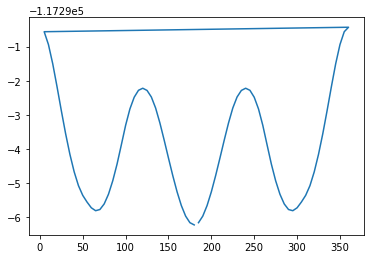

In [5]:
suppl = Chem.SDMolSupplier('/home/jsmith48/scratch/ccsd_extrapolation/ccsd_testcase/QM_MM_Gas_Phase_Torsion_Scan_Individual_Results_with_CCSD_T_CBS_baseline.sdf', removeHs=False)
for i,mol in enumerate(suppl):
    props = mol.GetPropsAsDict()
    
    if props['deltaE'] < 1.0e-3 and props['MinMethod'] == 'CCSD_T_CBS_MP2' and props['SMILES']=='CCCC':
        print(props['ScanVar_1'],props['deltaE'], props['SMILES'])
        print(props.keys())
        didx = np.fromstring(props['ScanAtoms_1'], dtype=np.uint32, sep=' ')
    
        ts = pya.ani_tortion_scanner(ens)
    
        p,e = ts.scan_tortion(mol, didx, 5.0, 72)
    
        plt.plot(p,e)
        plt.show()
